In [24]:
import sys

sys.path.insert(0,"../../src")
from numba import njit

import numpy as np
import hoomd
from hoomd import md
import helper
import potentials
import protocols
import importlib
import ex_render

In [19]:
context = hoomd.context.initialize("--mode=cpu")

HOOMD-blue 2.9.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 02/04/2020
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Lui, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU


In [20]:
system, snap = protocols.prepare_HTL(500, 0.9, 0)

notice(2): Group "all" created containing 500 particles
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 500
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
0
1
2
3
4
5
6


In [51]:
ys = protocols.find_yield_stress_distribution(system, snap)

11 17 22
0 17
31 93
<class 'numpy.ndarray'> (124, 2)
124 93
[0. 0.]
notice(2): Group "all" created containing 124 particles
notice(2): Group "tags 0-30" created containing 31 particles
*Warning*: group is deprecated. Creating default integrate.nve().
[[0, 0], [300000, 0.3]]
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 124
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
301 10 0.009 -0.00012085201072484574
301 20 0.019 -0.00023712072957507123
301 30 0.028999999999999998 -0.00034241519321913453
301 40 0.039 -0.0004438549039311326
301 50 0.048999999999999995 -0.0005415855873803833
301 60 0.059 -0.0006348510565394442
301 70 0.069 -0.0007171186575587387
301 80 0.07899999999999999 -0.0007929061364951686
301 90 0.08900000000000001 -0.0008684129025728232
301 100 0.099 -0.0009440030890429614
301 110 0.109 -0.0010186296733249538
301 120 0.119 -0.0010927583909187538
301 130

In [50]:
importlib.reload(protocols)
importlib.reload(ex_render)

<module 'ex_render' from '../../src/ex_render.py'>

In [4]:
test_dir = "../../test"

In [5]:
import glob
import gsd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
trajs = glob.glob(test_dir+"/traj*")

In [7]:
trajs

['../../test/traj_0_0_0.0000.gsd']

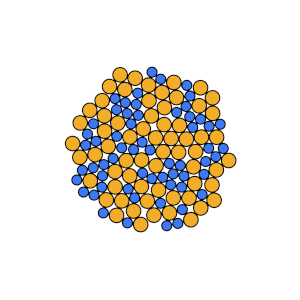

In [52]:
ex_render.display_movie(ex_render.render_disk_frame, trajs[0])

In [37]:
f = gsd.hoomd.open(trajs[0])

In [28]:
f.file.nframes

30

In [53]:
logs = glob.glob(test_dir+"/log*")

In [54]:
df = pd.read_csv(logs[0], sep='\t')

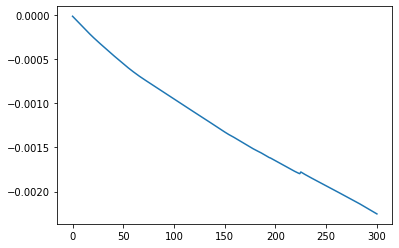

In [55]:
df.pressure_xy.plot()

In [41]:
tsnap = f[0]

In [48]:
pos = tsnap.particles.position[:,:2]

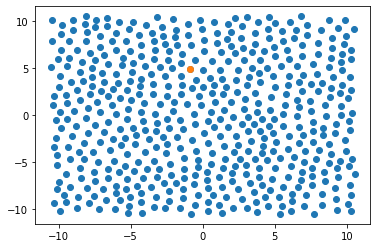

In [43]:
plt.scatter(pos[:,0],pos[:,1])
plt.scatter(pos[0,0],pos[0,1])

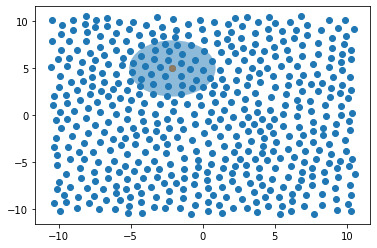

In [44]:
fig, ax = plt.subplots()
plt.scatter(pos[:,0],pos[:,1])
plt.scatter(pos[11,0],pos[11,1])
c1 = plt.Circle(pos[11], radius=3, alpha=.5)
ax.add_artist(c1)

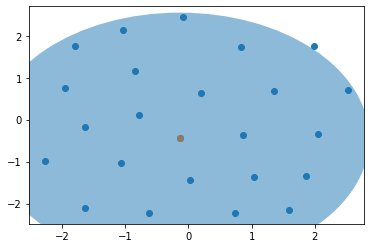

In [49]:
fig, ax = plt.subplots()
plt.scatter(pos[:24,0],pos[:24,1])
plt.scatter(pos[11,0],pos[11,1])
c1 = plt.Circle(pos[11], radius=3, alpha=.5)
ax.add_artist(c1)

In [34]:
len(pos)

51

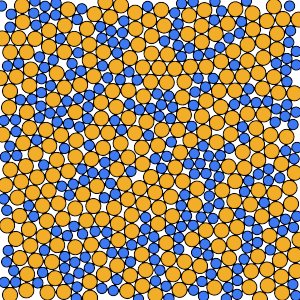

In [55]:
ex_render.render_disk_frame(snap)

In [101]:
protocols.pbc_dist(np.array([0.,1.]),np.array([1.,.5]),2)

array([-1. ,  0.5])